# Car Price Prediction Project

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

## This project contains two phase- 

### Data Collection Phase 

You have to scrape at least 100 used cars data. You can scrape more data as well, it’s up to you. more the data better the model In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback. 

### Model Building Phase 

After collecting the data, you need to build a machine learning model.

Before model building do all data pre-processing steps. 

Try different models with different hyper parameters and select the best model. 

Follow the complete life cycle of data science.

Include all the steps like. 
1. Data Cleaning 
2. Exploratory Data Analysis 
3. Data Pre-processing 
4. Model Building 
5. Model Evaluation 
6. Selecting the best model 

### 1.Data Collection Phase 

In [1]:
#collect data from Olx, cardekho, Cars24 websites by using selenium and beautiful soup
#import needed libraries
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

#exceptions
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.common.exceptions import ElementNotInteractableException

In [236]:
url='https://www.cars24.com/buy-used-car?sort=P&storeCityId=134&pinId=201301'

In [237]:
#open web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32 (2)\chromedriver.exe")
driver.get(url)

In [238]:
#scrape brand name
brand=[]
try:
    brands=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/h2')
    for x in brands:
        brand.append(x.text[5:])
except NoSuchElementException:
    brand.append('No deatils')
except StaleElementReferenceException:
    brand.append('No deatils')
print(len(brand),brand)

20 ['Hyundai Grand i10', 'Honda Amaze', 'Hyundai Grand i10', 'Maruti Wagon R 1.0', 'Mercedes Benz GLA Class', 'Maruti Swift', 'Mahindra Kuv100', 'Maruti Wagon R 1.0', 'Ford Ecosport', 'Audi A3', 'BMW X3', 'Hyundai GRAND I10 NIOS', 'Volkswagen Polo', 'Maruti S Cross', 'Maruti Ciaz', 'Toyota Innova', 'Tata Tiago', 'Maruti Alto K10', 'Jeep Compass', 'Maruti Baleno']


In [239]:
#scrape  manufacturing year
year=[]
try:
    brands=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/h2')
    for x in brands:
        year.append(x.text[:4])
except NoSuchElementException:
    year.append('No deatils')
except StaleElementReferenceException:
    year.append('No deatils')
print(len(year),year)

20 ['2020', '2013', '2017', '2010', '2015', '2011', '2017', '2016', '2019', '2014', '2013', '2021', '2015', '2018', '2021', '2014', '2021', '2012', '2019', '2018']


In [240]:
#scrape  price
price=[]
try:
    prices=driver.find_elements_by_xpath('//div[@class="_7udZZ"]/span')
    for x in prices:
        price.append(x.text.replace('₹','').replace(',',''))
except NoSuchElementException:
    price.append('No deatils')
except StaleElementReferenceException:
    price.append('No deatils')
print(len(price),price)

20 ['588499', '418899', '605799', '244099', '1816919', '314199', '345899', '431399', '765899', '1324099', '1158649', '541699', '399199', '940399', '1151399', '964299', '710599', '246999', '1367499', '525699']


In [241]:
#scrape  model
model=[]
try:
    models=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/p')
    for x in models:
        model.append(x.text.replace('Manual','').replace('Automatic',''))
except NoSuchElementException:
    model.append('No deatils')
except StaleElementReferenceException:
    model.append('No deatils')
print(len(model),model)

20 ['MAGNA 1.2 VTVT ', '1.2 EMT I VTEC ', 'SPORTZ (O) 1.2 AT VTVT ', 'LXI ', '200 CDI STYLE ', 'LXI ', 'K6+ 6 STR ', 'VXI AMT ', '1.5 TREND TI VCT ', '35TDI PREMIUM ', 'XDRIVE 20D ', 'ERA PETROL ', 'COMFORTLINE 1.2L PETROL ', 'ALPHA SHVS ', 'ALPHA 1.5 MT VTVT SHVS ', '2.5 VX 8 STR BS IV ', 'XTA 1.2 PETROL ', 'VXI ', '1.4 SPORT PETROL ', 'DELTA 1.2 K12 ']


In [242]:
#scrape variant
variant=[]
try:
    variants=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/p/span')
    for x in variants:
        variant.append(x.text)
except NoSuchElementException:
    variant.append('No deatils')
except StaleElementReferenceException:
    variant.append('No deatils')
print(len(variant),variant)

20 ['Manual', 'Manual', 'Automatic', 'Manual', 'Automatic', 'Manual', 'Manual', 'Automatic', 'Manual', 'Automatic', 'Automatic', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Automatic', 'Manual', 'Manual', 'Manual']


In [243]:
#scrape driven_kilometers
driven_kilometers=[]
try:
    driven_kilometerss=driver.find_elements_by_xpath('//ul[@class="bVR0c"]/li[1]')
    for x in driven_kilometerss:
        driven_kilometers.append(x.text.replace(',','').replace(' km',''))
except NoSuchElementException:
    driven_kilometers.append('No deatils')
except StaleElementReferenceException:
    driven_kilometers.append('No deatils')
print(len(driven_kilometers),driven_kilometers)

20 ['13223', '31102', '12855', '48915', '29331', '23874', '51310', '21261', '43463', '34088', '71065', '42369', '93769', '55921', '9370', '82295', '6568', '59674', '42163', '23315']


In [244]:
#scrape number_of_owners
number_of_owners=[]
try:
    number_of_ownerss=driver.find_elements_by_xpath('//ul[@class="bVR0c"]/li[2]')
    for x in number_of_ownerss:
        number_of_owners.append(x.text)
except NoSuchElementException:
    number_of_owners.append('No deatils')
except StaleElementReferenceException:
    number_of_owners.append('No deatils')
print(len(number_of_owners),number_of_owners)

20 ['2nd Owner', '1st Owner', '1st Owner', '2nd Owner', '1st Owner', '1st Owner', '1st Owner', '1st Owner', '1st Owner', '2nd Owner', '2nd Owner', '1st Owner', '1st Owner', '1st Owner', '1st Owner', '1st Owner', '1st Owner', '1st Owner', '2nd Owner', '3rd Owner']


In [245]:
#scrape fuel
fuel=[]
try:
    fuels=driver.find_elements_by_xpath('//ul[@class="bVR0c"]/li[3]')
    for x in fuels:
        fuel.append(x.text)
except NoSuchElementException:
    fuel.append('No deatils')
except StaleElementReferenceException:
    fuel.append('No deatils')
print(len(fuel),fuel)

20 ['Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol']


In [246]:
driver.close()

In [247]:
url='https://www.cars24.com/buy-used-car?sort=P&search=MARUTI%20SUZUKI&storeCityId=8597&pinId=201301'

In [248]:
#open web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32 (2)\chromedriver.exe")
driver.get(url)

In [249]:
def brand1():
    #scrape brand name
    try:
        brands=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/h2')
        for x in brands:
            brand.append(x.text[5:])
    except NoSuchElementException:
        brand.append('No deatils')
    except StaleElementReferenceException:
        brand.append('No deatils')
    print(len(brand),brand)

In [250]:
def year1():
    #scrape  manufacturing year
    try:
        brands=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/h2')
        for x in brands:
            year.append(x.text[:4])
    except NoSuchElementException:
        year.append('No deatils')
    except StaleElementReferenceException:
        year.append('No deatils')
    print(len(year),year)

In [251]:
def price1():
    #scrape  price
    try:
        prices=driver.find_elements_by_xpath('//div[@class="_7udZZ"]/span')
        for x in prices:
            price.append(x.text.replace('₹','').replace(',',''))
    except NoSuchElementException:
        price.append('No deatils')
    except StaleElementReferenceException:
        price.append('No deatils')
    print(len(price),price)

In [252]:
def model1():
    #scrape  model
    try:
        models=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/p')
        for x in models:
            model.append(x.text.replace('Manual','').replace('Automatic',''))
    except NoSuchElementException:
        model.append('No deatils')
    except StaleElementReferenceException:
        model.append('No deatils')
    print(len(model),model)

In [253]:
def variant1():
    #scrape variant
    try:
        variants=driver.find_elements_by_xpath('//div[@class="_1jpRU"]/p/span')
        for x in variants:
            variant.append(x.text)
    except NoSuchElementException:
        variant.append('No deatils')
    except StaleElementReferenceException:
        variant.append('No deatils')
    print(len(variant),variant)

In [254]:
def kms():
    #scrape driven_kilometers
    try:
        driven_kilometerss=driver.find_elements_by_xpath('//ul[@class="bVR0c"]/li[1]')
        for x in driven_kilometerss:
            driven_kilometers.append(x.text.replace(',','').replace(' km',''))
    except NoSuchElementException:
        driven_kilometers.append('No deatils')
    except StaleElementReferenceException:
        driven_kilometers.append('No deatils')
    print(len(driven_kilometers),driven_kilometers)

In [255]:
def owners():
    #scrape number_of_owners
    try:
        number_of_ownerss=driver.find_elements_by_xpath('//ul[@class="bVR0c"]/li[2]')
        for x in number_of_ownerss:
            number_of_owners.append(x.text)
    except NoSuchElementException:
        number_of_owners.append('No deatils')
    except StaleElementReferenceException:
        number_of_owners.append('No deatils')
    print(len(number_of_owners),number_of_owners)

In [256]:
def fuel1():
    #scrape fuel
    try:
        fuels=driver.find_elements_by_xpath('//ul[@class="bVR0c"]/li[3]')
        for x in fuels:
            fuel.append(x.text)
    except NoSuchElementException:
        fuel.append('No deatils')
    except StaleElementReferenceException:
        fuel.append('No deatils')
    print(len(fuel),fuel)

In [257]:
def main():
    print(brand1())
    print(price1())
    print(model1())
    print(year1())
    print(variant1())
    print(fuel1())
    print(kms())
    print(owners())

In [258]:
main()

40 ['Hyundai Grand i10', 'Honda Amaze', 'Hyundai Grand i10', 'Maruti Wagon R 1.0', 'Mercedes Benz GLA Class', 'Maruti Swift', 'Mahindra Kuv100', 'Maruti Wagon R 1.0', 'Ford Ecosport', 'Audi A3', 'BMW X3', 'Hyundai GRAND I10 NIOS', 'Volkswagen Polo', 'Maruti S Cross', 'Maruti Ciaz', 'Toyota Innova', 'Tata Tiago', 'Maruti Alto K10', 'Jeep Compass', 'Maruti Baleno', 'Maruti Baleno', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Ertiga', 'Maruti Alto', 'Maruti Ciaz', 'Maruti Ciaz', 'Maruti Alto', 'Maruti Baleno', 'Maruti Ciaz', 'Maruti Swift', 'Maruti Ciaz', 'Maruti Baleno', 'Maruti Swift', 'Maruti Ritz', 'Maruti Swift']
None
40 ['588499', '418899', '605799', '244099', '1816919', '314199', '345899', '431399', '765899', '1324099', '1158649', '541699', '399199', '940399', '1151399', '964299', '710599', '246999', '1367499', '525699', '677299', '485699', '401299', '405799', '488499', '393499', '389999', '528899', '505399', '569299',

In [259]:
driver.close()

In [260]:
url='https://www.cars24.com/buy-used-car?sort=P&search=HYUNDAI&storeCityId=8597&pinId=201301'

In [261]:
#open web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32 (2)\chromedriver.exe")
driver.get(url)

In [262]:
main()

60 ['Hyundai Grand i10', 'Honda Amaze', 'Hyundai Grand i10', 'Maruti Wagon R 1.0', 'Mercedes Benz GLA Class', 'Maruti Swift', 'Mahindra Kuv100', 'Maruti Wagon R 1.0', 'Ford Ecosport', 'Audi A3', 'BMW X3', 'Hyundai GRAND I10 NIOS', 'Volkswagen Polo', 'Maruti S Cross', 'Maruti Ciaz', 'Toyota Innova', 'Tata Tiago', 'Maruti Alto K10', 'Jeep Compass', 'Maruti Baleno', 'Maruti Baleno', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Ertiga', 'Maruti Alto', 'Maruti Ciaz', 'Maruti Ciaz', 'Maruti Alto', 'Maruti Baleno', 'Maruti Ciaz', 'Maruti Swift', 'Maruti Ciaz', 'Maruti Baleno', 'Maruti Swift', 'Maruti Ritz', 'Maruti Swift', 'Hyundai VENUE', 'Hyundai Creta', 'Hyundai i20', 'Hyundai VENUE', 'Hyundai i10', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Verna', 'Hyundai Eon', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Verna', 'Hyundai Creta', 'Hyundai i20', 'Hyundai Eon', 

In [263]:
driver.close()

In [264]:
url='https://www.cars24.com/buy-used-car?sort=P&search=HONDA&storeCityId=8597&pinId=201301'

In [265]:
#open web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32 (2)\chromedriver.exe")
driver.get(url)

In [266]:
main()

80 ['Hyundai Grand i10', 'Honda Amaze', 'Hyundai Grand i10', 'Maruti Wagon R 1.0', 'Mercedes Benz GLA Class', 'Maruti Swift', 'Mahindra Kuv100', 'Maruti Wagon R 1.0', 'Ford Ecosport', 'Audi A3', 'BMW X3', 'Hyundai GRAND I10 NIOS', 'Volkswagen Polo', 'Maruti S Cross', 'Maruti Ciaz', 'Toyota Innova', 'Tata Tiago', 'Maruti Alto K10', 'Jeep Compass', 'Maruti Baleno', 'Maruti Baleno', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Ertiga', 'Maruti Alto', 'Maruti Ciaz', 'Maruti Ciaz', 'Maruti Alto', 'Maruti Baleno', 'Maruti Ciaz', 'Maruti Swift', 'Maruti Ciaz', 'Maruti Baleno', 'Maruti Swift', 'Maruti Ritz', 'Maruti Swift', 'Hyundai VENUE', 'Hyundai Creta', 'Hyundai i20', 'Hyundai VENUE', 'Hyundai i10', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Verna', 'Hyundai Eon', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Verna', 'Hyundai Creta', 'Hyundai i20', 'Hyundai Eon', 

In [267]:
driver.close()

In [275]:
url='https://www.cars24.com/buy-used-car?sort=P&search=MARUTI%20SUZUKI&storeCityId=8597&pinId=560001'

In [278]:
#open web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32 (2)\chromedriver.exe")
driver.get(url)

In [270]:
main()

100 ['Hyundai Grand i10', 'Honda Amaze', 'Hyundai Grand i10', 'Maruti Wagon R 1.0', 'Mercedes Benz GLA Class', 'Maruti Swift', 'Mahindra Kuv100', 'Maruti Wagon R 1.0', 'Ford Ecosport', 'Audi A3', 'BMW X3', 'Hyundai GRAND I10 NIOS', 'Volkswagen Polo', 'Maruti S Cross', 'Maruti Ciaz', 'Toyota Innova', 'Tata Tiago', 'Maruti Alto K10', 'Jeep Compass', 'Maruti Baleno', 'Maruti Baleno', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Celerio', 'Maruti Swift', 'Maruti Swift', 'Maruti Ertiga', 'Maruti Alto', 'Maruti Ciaz', 'Maruti Ciaz', 'Maruti Alto', 'Maruti Baleno', 'Maruti Ciaz', 'Maruti Swift', 'Maruti Ciaz', 'Maruti Baleno', 'Maruti Swift', 'Maruti Ritz', 'Maruti Swift', 'Hyundai VENUE', 'Hyundai Creta', 'Hyundai i20', 'Hyundai VENUE', 'Hyundai i10', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Verna', 'Hyundai Eon', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Creta', 'Hyundai Verna', 'Hyundai Creta', 'Hyundai i20', 'Hyundai Eon',

In [271]:
driver.close()

### Make dataset

In [272]:
#Make dataframe
df=pd.DataFrame()
df['Car_Brand']=brand
df['Manufacturing_Year']=year
df['Car_Model']=model
df['Car_Variant']=variant
df['Driven_Kilometers']=driven_kilometers
df['Fuel']=fuel
df['Number_of_owners']=number_of_owners
df['Car_Price']=price
df

,Car_Brand,Manufacturing_Year,Car_Model,Car_Variant,Driven_Kilometers,Fuel,Number_of_owners,Car_Price
0,Hyundai Grand i10,2020,MAGNA 1.2 VTVT,Manual,13223,Petrol,2nd Owner,588499
1,Honda Amaze,2013,1.2 EMT I VTEC,Manual,31102,Petrol,1st Owner,418899
2,Hyundai Grand i10,2017,SPORTZ (O) 1.2 AT VTVT,Automatic,12855,Petrol,1st Owner,605799
3,Maruti Wagon R 1.0,2010,LXI,Manual,48915,Petrol,2nd Owner,244099
4,Mercedes Benz GLA Class,2015,200 CDI STYLE,Automatic,29331,Diesel,1st Owner,1816919
...,...,...,...,...,...,...,...,...
95,Maruti Alto,2008,LXI,Manual,46558,Petrol,2nd Owner,192399
96,Maruti Alto,2020,LXI,Manual,12428,Petrol,1st Owner,413999
97,Maruti Swift,2016,VXI,Manual,20247,Petrol,2nd Owner,508699
98,Maruti Baleno,2019,DELTA 1.2 K12,Manual,28310,Petrol,1st Owner,702999


In [279]:
df.head()

,Car_Brand,Manufacturing_Year,Car_Model,Car_Variant,Driven_Kilometers,Fuel,Number_of_owners,Car_Price
0,Hyundai Grand i10,2020,MAGNA 1.2 VTVT,Manual,13223,Petrol,2nd Owner,588499
1,Honda Amaze,2013,1.2 EMT I VTEC,Manual,31102,Petrol,1st Owner,418899
2,Hyundai Grand i10,2017,SPORTZ (O) 1.2 AT VTVT,Automatic,12855,Petrol,1st Owner,605799
3,Maruti Wagon R 1.0,2010,LXI,Manual,48915,Petrol,2nd Owner,244099
4,Mercedes Benz GLA Class,2015,200 CDI STYLE,Automatic,29331,Diesel,1st Owner,1816919


In [274]:
df.to_csv('car_price.csv')

### 2. Model Building Phase

In [280]:
#import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [281]:
#read csv file
df=pd.read_csv('car_price.csv')

In [282]:
df.head()

,Unnamed: 0,Car_Brand,Manufacturing_Year,Car_Model,Car_Variant,Driven_Kilometers,Fuel,Number_of_owners,Car_Price
0,0,Hyundai Grand i10,2020,MAGNA 1.2 VTVT,Manual,13223,Petrol,2nd Owner,588499
1,1,Honda Amaze,2013,1.2 EMT I VTEC,Manual,31102,Petrol,1st Owner,418899
2,2,Hyundai Grand i10,2017,SPORTZ (O) 1.2 AT VTVT,Automatic,12855,Petrol,1st Owner,605799
3,3,Maruti Wagon R 1.0,2010,LXI,Manual,48915,Petrol,2nd Owner,244099
4,4,Mercedes Benz GLA Class,2015,200 CDI STYLE,Automatic,29331,Diesel,1st Owner,1816919


In [284]:
#columns
df.columns

Index(['Unnamed: 0', 'Car_Brand', 'Manufacturing_Year', 'Car_Model',
       'Car_Variant', 'Driven_Kilometers', 'Fuel', 'Number_of_owners',
       'Car_Price'],
      dtype='object')

In [285]:
df.drop('Unnamed: 0',inplace=True,axis=1)#just an sequence number

##### About columns:

###### 1. Car Brand

In this column contain name of the car brand

###### 2. Manufacturing_Year

In this column contain Manufacturing Year of car

###### 3. Car_Model

In this column contain the Car Model

###### 4. Car_Variant

In this column contain the Car Variant like Automatic or Manual

###### 5. Driven_Kilometers

In this column contain the Driven Kilometers means how many kilometers the car is run

###### 6. Fuel

Which type of fuel is used for that car

###### 7. Number_of_owners

In this column that Number of owners can change that car

###### 8. Price

In this column contain Price of the Car(Target Variable)

#### Exploratory Data Analysis

In [286]:
#check shape of dataset
df.shape

(100, 8)

100 rows and 8 columns

In [287]:
#check all dtypes 
df.dtypes

Car_Brand             object
Manufacturing_Year     int64
Car_Model             object
Car_Variant           object
Driven_Kilometers      int64
Fuel                  object
Number_of_owners      object
Car_Price              int64
dtype: object

<AxesSubplot:>

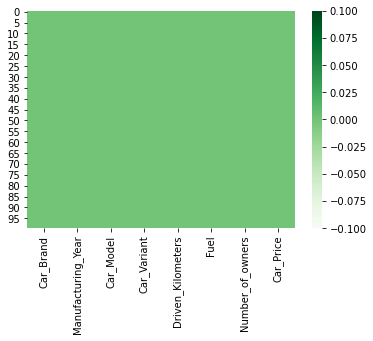

In [288]:
#check the null values using Heatmap 
sns.heatmap(df.isnull(),cmap='Greens')

In [289]:
#check the null values and sum the null values order by column
df.isnull().sum()

Car_Brand             0
Manufacturing_Year    0
Car_Model             0
Car_Variant           0
Driven_Kilometers     0
Fuel                  0
Number_of_owners      0
Car_Price             0
dtype: int64

In [290]:
#check the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_Brand           100 non-null    object
 1   Manufacturing_Year  100 non-null    int64 
 2   Car_Model           100 non-null    object
 3   Car_Variant         100 non-null    object
 4   Driven_Kilometers   100 non-null    int64 
 5   Fuel                100 non-null    object
 6   Number_of_owners    100 non-null    object
 7   Car_Price           100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


###### observations:-

1. 100 entries(rows)
2. Data columns (total 8 columns)
3. There is no null values
4. dtypes: int64(3), object(5)
5. memory usage: 6.4+ KB

In [292]:
#check the uniques
df.nunique()

Car_Brand             34
Manufacturing_Year    14
Car_Model             67
Car_Variant            2
Driven_Kilometers     99
Fuel                   3
Number_of_owners       3
Car_Price             99
dtype: int64

In [293]:
#check the unique of variable
print(df['Manufacturing_Year'].unique())
#count the unique values
print(df['Manufacturing_Year'].value_counts())

[2020 2013 2017 2010 2015 2011 2016 2019 2014 2021 2018 2012 2009 2008]
2018    17
2015    13
2016    11
2019    11
2014    10
2017     9
2013     8
2021     8
2020     5
2010     3
2012     2
2008     1
2009     1
2011     1
Name: Manufacturing_Year, dtype: int64


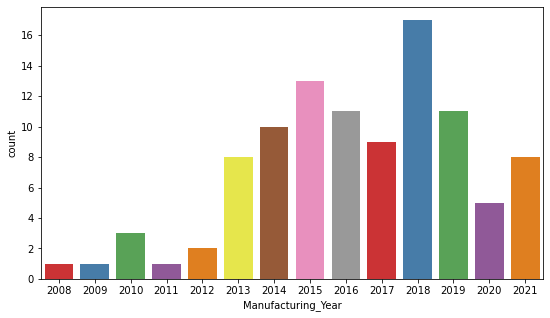

In [294]:
#count plot of variable
plt.figure(figsize=(9,5))
sns.countplot(df['Manufacturing_Year'],palette='Set1');

In [295]:
#check the unique of variable
print(df['Car_Variant'].unique())
#count the unique values
print(df['Car_Variant'].value_counts())

['Manual' 'Automatic']
Manual       80
Automatic    20
Name: Car_Variant, dtype: int64


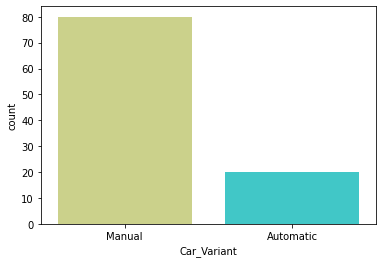

In [297]:
#count plot of variable
sns.countplot(df['Car_Variant'],palette='rainbow_r');

In [303]:
#check the unique of variable
print(df['Fuel'].unique())
#count the unique values
print(df['Fuel'].value_counts())

['Petrol' 'Diesel' 'Petrol + CNG']
Petrol          68
Diesel          31
Petrol + CNG     1
Name: Fuel, dtype: int64


In [304]:
df['Fuel']=df['Fuel'].replace('Petrol + CNG','Petrol')

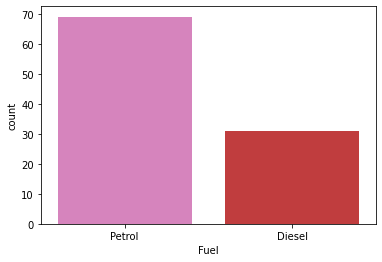

In [308]:
#count plot of variable
sns.countplot(df['Fuel'],palette='tab10_r');

In [309]:
#check the unique of variable
print(df['Number_of_owners'].unique())
#count the unique values
print(df['Number_of_owners'].value_counts())

['2nd Owner' '1st Owner' '3rd Owner']
1st Owner    82
2nd Owner    16
3rd Owner     2
Name: Number_of_owners, dtype: int64


In [310]:
df['Number_of_owners']=df['Number_of_owners'].replace('2nd Owner',2)
df['Number_of_owners']=df['Number_of_owners'].replace('3rd Owner',3)
df['Number_of_owners']=df['Number_of_owners'].replace('1st Owner',1)

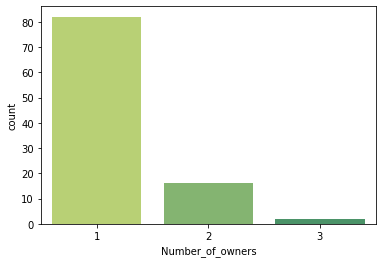

In [311]:
#count plot of variable
sns.countplot(df['Number_of_owners'],palette='summer_r');

#### Data Pre-processing

##### Label Encoder

In [312]:
from sklearn.preprocessing import LabelEncoder

In [334]:
df1=df.copy()

In [335]:
df1.drop('Car_Price',inplace=True,axis=1)

In [336]:
df1=df1.apply(LabelEncoder().fit_transform)

In [337]:
df1['Price']=df['Car_Price']

In [338]:
df1.head()

,Car_Brand,Manufacturing_Year,Car_Model,Car_Variant,Driven_Kilometers,Fuel,Number_of_owners,Price
0,10,12,38,1,10,1,1,588499
1,3,5,1,1,38,1,0,418899
2,10,9,42,0,8,1,0,605799
3,29,2,35,1,61,1,1,244099
4,30,7,20,0,33,0,0,1816919


In [339]:
#describe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Car_Brand,100.0,15.46,9.542483,0.0,7.00,17.0,23.25,33.0
Manufacturing_Year,100.0,8.33,2.926904,0.0,6.00,8.5,10.00,13.0
Car_Model,100.0,34.21,19.059871,0.0,17.75,35.5,52.00,66.0
Car_Variant,100.0,0.80,0.402015,0.0,1.00,1.0,1.00,1.0
Driven_Kilometers,100.0,48.89,28.598543,0.0,24.75,48.5,73.25,98.0
Fuel,100.0,0.69,0.464823,0.0,0.00,1.0,1.00,1.0
Number_of_owners,100.0,0.20,0.449467,0.0,0.00,0.0,0.00,2.0
Price,100.0,634052.79,296138.735872,192399.0,418899.00,576149.0,780099.00,1816919.0


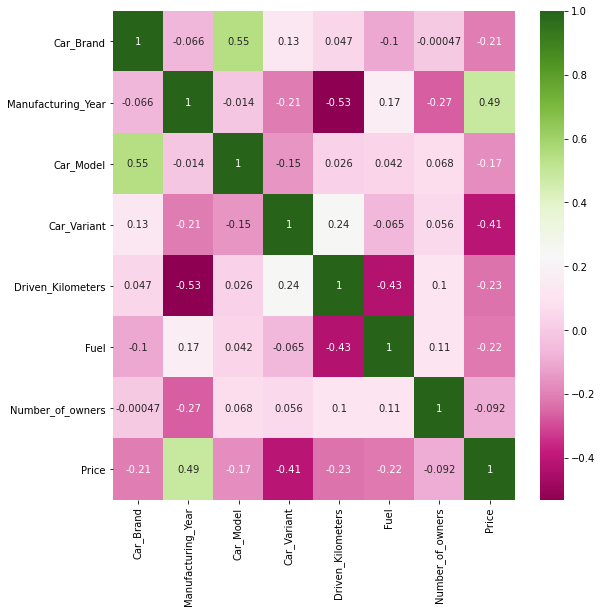

In [344]:
#checking correlation with each other by using heat map
plt.figure(figsize=(9,9))
sns.heatmap(df1.corr(),annot=True,cmap='PiYG');

In [347]:
#checking correlation with each other
df1.corr()

,Car_Brand,Manufacturing_Year,Car_Model,Car_Variant,Driven_Kilometers,Fuel,Number_of_owners,Price
Car_Brand,1.000000,-0.065886,0.546393,0.129547,0.047231,-0.104163,-0.000471,-0.206504
Manufacturing_Year,-0.065886,1.000000,-0.013929,-0.209461,-0.532215,0.165047,-0.265665,0.487201
Car_Model,0.546393,-0.013929,1.000000,-0.153973,0.025560,0.041626,0.068151,-0.169280
Car_Variant,0.129547,-0.209461,-0.153973,1.000000,0.242311,-0.064866,0.055902,-0.408588
Driven_Kilometers,0.047231,-0.532215,0.025560,0.242311,1.000000,-0.428872,0.102314,-0.228056
Fuel,-0.104163,0.165047,0.041626,-0.064866,-0.428872,1.000000,0.106366,-0.218095
Number_of_owners,-0.000471,-0.265665,0.068151,0.055902,0.102314,0.106366,1.000000,-0.092083
Price,-0.206504,0.487201,-0.169280,-0.408588,-0.228056,-0.218095,-0.092083,1.000000


###### observations:-

1. Car_Brand is high positive correlation with Car_Model and high negative correlation with price
2. Manufacturing_Year is high positive correlation with Price and high negative correlation with Driven_Kilometers
3. Car_Model is high positive correlation with Car_Brand and high negative correlation with Price
4. Car_Variant is high positive correlation with Price and high negative correlation with Driven_Kilometers

In [349]:
df_target=df1.corr()

In [350]:
df_target['Price'].sort_values(ascending=False)

Price                 1.000000
Manufacturing_Year    0.487201
Number_of_owners     -0.092083
Car_Model            -0.169280
Car_Brand            -0.206504
Fuel                 -0.218095
Driven_Kilometers    -0.228056
Car_Variant          -0.408588
Name: Price, dtype: float64

###### observations:-

1. Manufacturing_Year are high positive correlation with Price(target) variable
2. Car_Variant are high negative correlation with Price(Target) variable

##### Scatter Plot

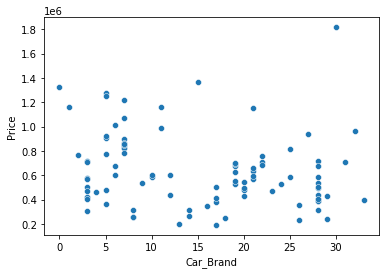

In [354]:
sns.scatterplot(df1['Car_Brand'],df1['Price']);

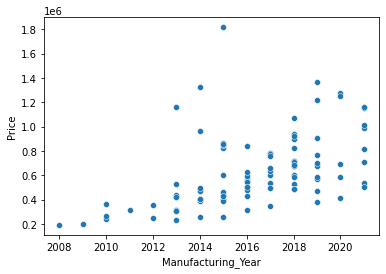

In [356]:
sns.scatterplot(df['Manufacturing_Year'],df1['Price']);

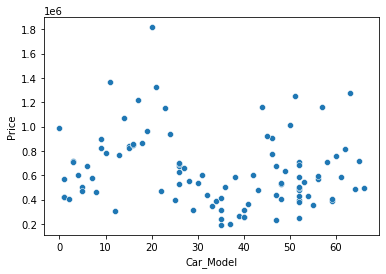

In [357]:
sns.scatterplot(df1['Car_Model'],df1['Price']);

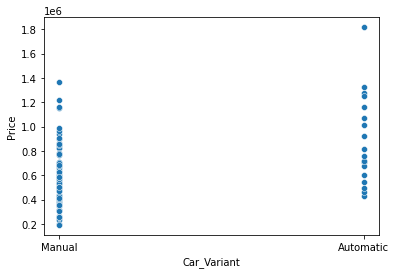

In [358]:
sns.scatterplot(df['Car_Variant'],df1['Price']);

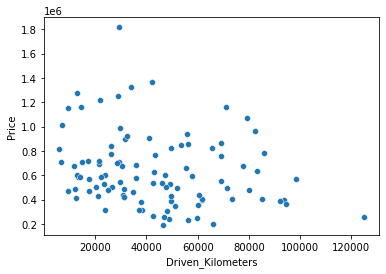

In [359]:
sns.scatterplot(df['Driven_Kilometers'],df1['Price']);

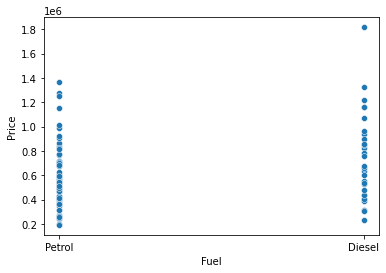

In [360]:
sns.scatterplot(df['Fuel'],df1['Price']);

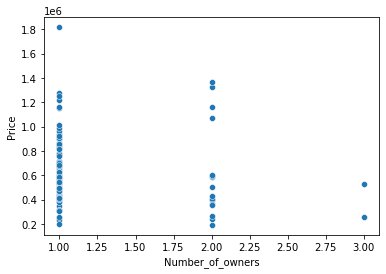

In [361]:
sns.scatterplot(df['Number_of_owners'],df1['Price']);

#### Checking outliers

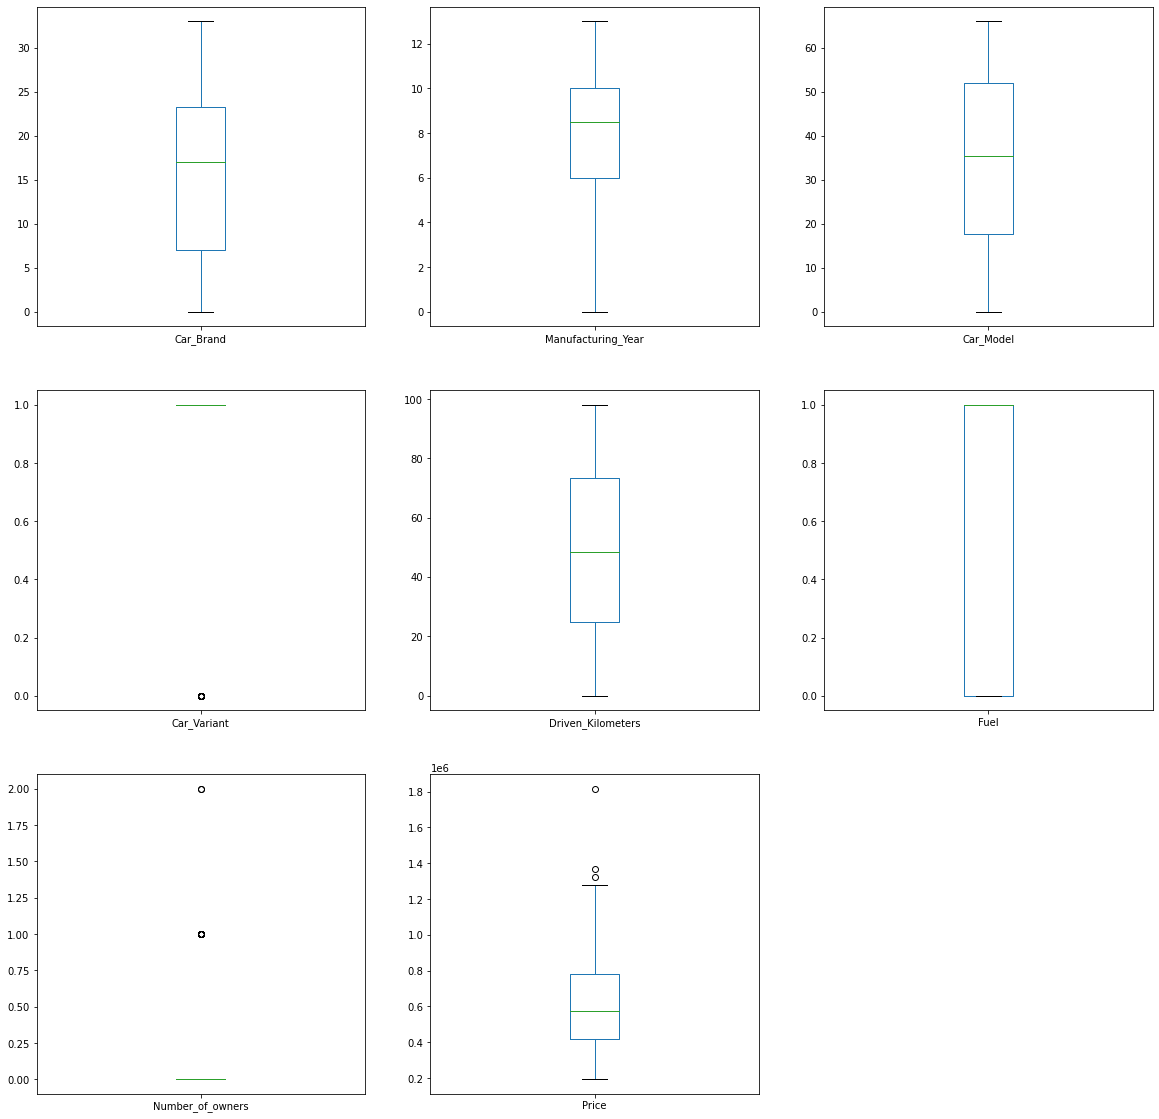

In [362]:
df1.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,20));

#### check the skewness

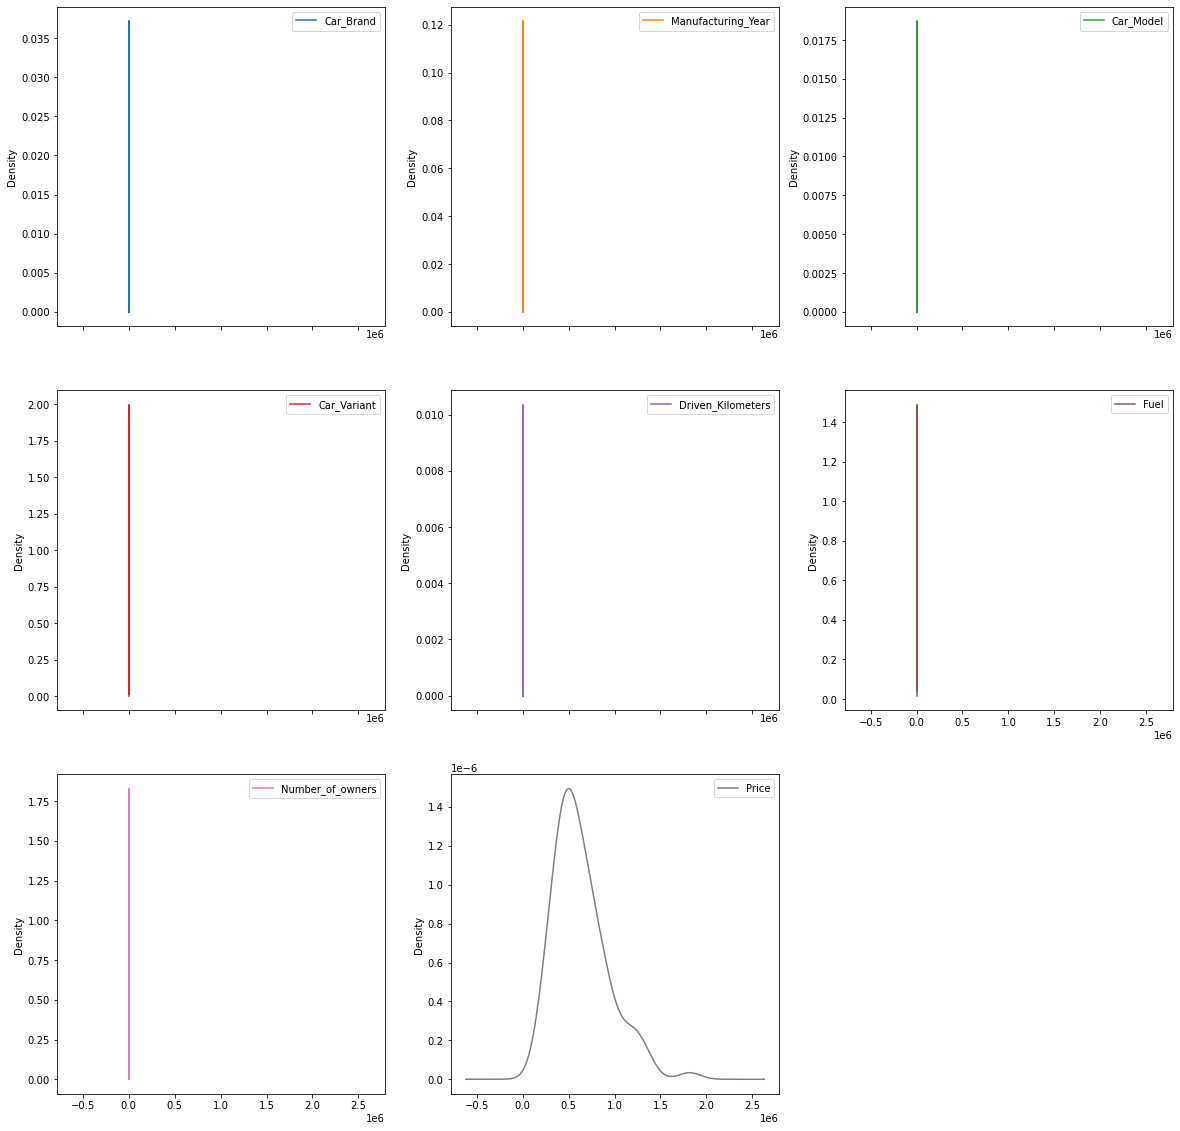

In [363]:
df1.plot(kind='density',subplots=True,layout=(3,3),figsize=(20,20));

#### variance Inflation factor

In [364]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [365]:
x=df1.drop('Price',axis=1)
y=df1['Price']

In [368]:
def vif():
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [369]:
vif()

,variables,VIF factor
0,Car_Brand,5.665180
1,Manufacturing_Year,5.517082
2,Car_Model,6.605584
3,Car_Variant,5.392472
4,Driven_Kilometers,3.964244
5,Fuel,3.523104
6,Number_of_owners,1.304532


#### standard scale

In [370]:
from sklearn.preprocessing import MinMaxScaler

In [371]:
scale=MinMaxScaler()

In [372]:
x=scale.fit_transform(x)

### Model Buliding

In [376]:
print(x.shape)
print(y.shape)

(100, 7)
(100,)


In [389]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#model selection'
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [390]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
lasso=Lasso()
ridge=Ridge()

In [391]:
models=[lr,dtr,knr,svr,rfr,abr,gbr,lasso,ridge]

#### LinearRegression

In [388]:
maxscore=0
rnum=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.5980634681268965 Random number: 78


In [405]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=78)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 274680.946518309
mean_squared_error: 144944948168.72156
r2_score: -3.6758949481444834


#### DecisionTreeRegressor

In [392]:
maxscore=0
rnum=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 1.0 Random number: 1


In [407]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 197424.6
mean_squared_error: 82481929081.1
r2_score: -1.0745913157391969


#### KNeighborsRegressor

In [393]:
maxscore=0
rnum=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.6493318482477111 Random number: 52


In [408]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=52)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 203964.65
mean_squared_error: 109005706650.85
r2_score: -3.1023861447743126


#### Support Vector Regressor

In [394]:
maxscore=0
rnum=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0 Random number: 0


In [410]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=30)
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 201311.8910152282
mean_squared_error: 64798931913.77665
r2_score: -5696313904.137399


#### RandomForestRegressor

In [396]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.9475631014391065 Random number: 67


In [411]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=67)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 186704.293
mean_squared_error: 88679217905.824
r2_score: -2.0392165209830657


#### AdaBoostRegressor

In [398]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.8980324287579311 Random number: 28


In [412]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=28)
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 213893.5805317844
mean_squared_error: 69862065741.90543
r2_score: -1.49108657137718


#### GradientBoostingRegressor

In [399]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbr.fit(x_train,y_train)
    score=gbr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.9966645969212751 Random number: 21


In [413]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=21)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 181896.9943752289
mean_squared_error: 60099836488.67781
r2_score: 0.14097596625046616


#### Lasso Regressor

In [400]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.5980634659574151 Random number: 78


In [414]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=78)
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 274679.32360348094
mean_squared_error: 144942261298.90515
r2_score: -3.676224370082709


#### Ridge Regressor

In [401]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.5813934279508612 Random number: 78


In [415]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=78)
ridge.fit(x_train,y_train)
pred=ridge.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 276509.2857230803
mean_squared_error: 140283289636.94067
r2_score: -5.140507637299247


#### Cross Validation

In [404]:
for model in models:
    print(model)
    score=cross_val_score(model,x,y,cv=2)
    print(score)
    print(score.mean())

LinearRegression()
[ 0.19217224 -0.39163586]
-0.0997318107168893
DecisionTreeRegressor()
[-0.03796965 -2.05904194]
-1.048505795550481
KNeighborsRegressor()
[ 0.15806281 -0.02816657]
0.06494812013772688
SVR()
[-0.01161031 -0.15357515]
-0.08259273112321064
RandomForestRegressor()
[ 0.20865465 -0.12119039]
0.043732130352814924
AdaBoostRegressor()
[ 0.22875871 -0.14604301]
0.041357850463925816
GradientBoostingRegressor()
[ 0.27383898 -1.03927825]
-0.38271963439068407
Lasso()
[ 0.19221795 -0.39162806]
-0.09970505890031517
Ridge()
[2.98722669e-01 2.91032012e-04]
0.14950685049569484


#### GradientBoostingRegressor is the best model

In [419]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=21)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 175008.15506216936
mean_squared_error: 55762901884.462524
r2_score: 0.1816672529886234


#### Gradientboostingregressor Hyperparameter Tuning

In [423]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [424]:
print(gsearch1.best_estimator_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=20,
                          random_state=10, subsample=0.8)
{'n_estimators': 20}
nan


#### Save the model

In [428]:
import joblib
#save the model
joblib.dump(gbr,'car_price.obj')
#load the model
loaded_model=joblib.load('car_price.obj')
#test the model is working or not
print(loaded_model.predict(x_test))

[ 474871.08207439  318440.53517877  544248.64595487  572102.00878593
  665973.06683987  861768.5293482   332286.64113748  560979.0479807
 1158587.06752796  808911.4203749   453547.30312229  539923.95599228
  219186.95719471  656359.12777397  821319.24245875 1167969.82025407
  280437.30552606  685192.21762528  933745.06180232  777203.73860486]
